In [368]:
import pandas as pd
import numpy as np

In [369]:
file_path = '/Applications/spam classifier/spam.csv'

# Try different encodings
encodings_to_try = ['utf-8', 'ISO-8859-1', 'latin1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"Successfully read the file with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
        continue
    except Exception as e:
        print(f"An error occurred: {e}")
        break
else:
    print("Unable to read the file with any of the specified encodings.")

# Display the DataFrame
print(df)

Failed to read with encoding: utf-8
Successfully read the file with encoding: ISO-8859-1
        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

In [370]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [371]:
df.shape

(5572, 5)

DATA CLEANING

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [373]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [374]:
# drop last 3 columns
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [375]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [376]:
# renaming the column
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [377]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [378]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [379]:
df['target'] = encoder.fit_transform(df['target'])

In [380]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [381]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [382]:
# duplicates
df.duplicated().sum()

403

In [383]:
# remove duplicates
df = df.drop_duplicates()

In [384]:
df.duplicated().sum()

0

In [385]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [386]:
df.shape

(5169, 2)

EDA

In [387]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [388]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7fbc1a8c97c0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

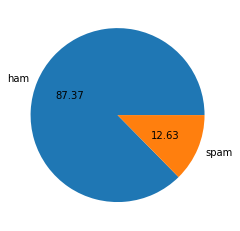

In [389]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")

In [390]:
#data is imbalanced

In [391]:
import nltk

In [392]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shreyanshtehanguria/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [393]:
#create a new column that stores the number of characters in each message
df['count'] = df['text'].apply(len)

In [394]:
df.head()

,target,text,count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [395]:
# number of words
df['no_of_words'] = df["text"].apply(lambda n: len(nltk.word_tokenize(n)))

In [396]:
df.head()

,target,text,count,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [397]:
# number of sentences
df['no_of_sentences'] = df["text"].apply(lambda n: len(nltk.sent_tokenize(n)))

In [398]:
df.head()

,target,text,count,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [399]:
# checking the stats for ham and spam messages
df[df['target'] == 0][['count', 'no_of_words', 'no_of_sentences']].describe()

,count,no_of_words,no_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [400]:
# spam 
df[df['target'] == 1][['count', 'no_of_words', 'no_of_sentences']].describe()

,count,no_of_words,no_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [401]:
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='Count'>

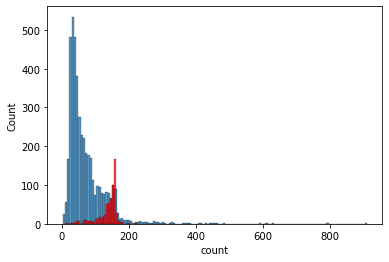

In [402]:
sns.histplot(df[df['target'] == 0]['count'])
sns.histplot(df[df['target'] == 1]['count'], color='red')

<AxesSubplot:xlabel='no_of_words', ylabel='Count'>

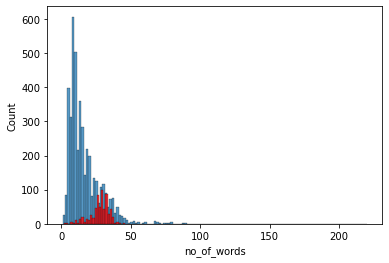

In [403]:
sns.histplot(df[df['target'] == 0]['no_of_words'])
sns.histplot(df[df['target'] == 1]['no_of_words'], color='red')

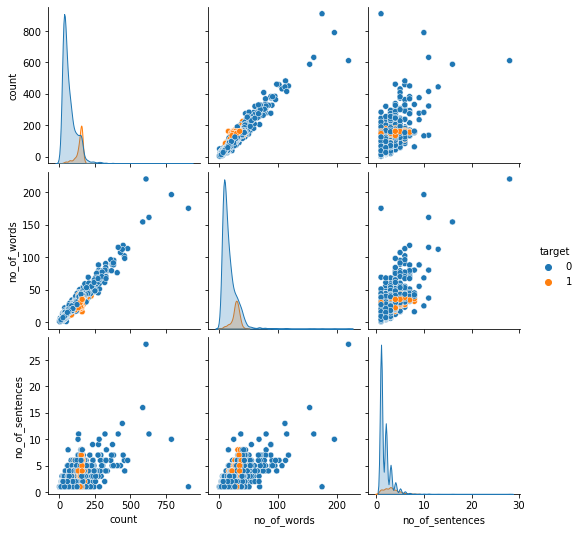

In [404]:
sns.pairplot(df, hue='target')

<AxesSubplot:>

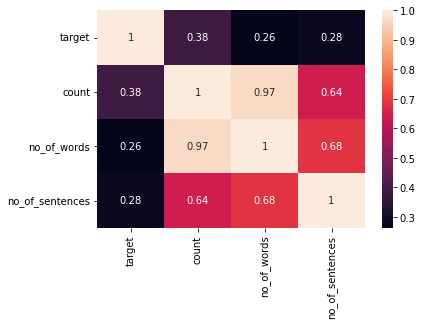

In [405]:
sns.heatmap(df.corr(), annot=True)

Text Preprocessing

In [406]:
from nltk.corpus import stopwords

In [407]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [408]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)


    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [409]:
transform_text('Hi! How are you?')

'hi'

In [410]:
df['transform_text'] = df['text'].apply(transform_text)

In [411]:
df.head()

,target,text,count,no_of_words,no_of_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [412]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [413]:
from wordcloud import WordCloud
wc = WordCloud(width=50, height=50, min_font_size=10, background_color='white')

In [414]:
# find the numaber of words in spam and ham messages

In [415]:
spam_corpus = []
for msg in  df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [416]:
len(spam_corpus)

9939

MODEL BUILDING

In [417]:
#Naive Bayes

# 1. Covert the text data into vectors through "Bag of Words Model"
# 2. 

In [444]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3000)

In [445]:
X = tf.fit_transform(df['transform_text']).toarray()

In [446]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [447]:
X.shape

(5169, 3000)

In [448]:
y = df['target'].values

In [449]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [450]:
from sklearn.model_selection import train_test_split

In [451]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=2)

In [452]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [453]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [454]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [455]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [456]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187
